* get mosaiks geometry (CRS missing) 
* write functions to get geometry of mosaiks
* join mosaiks and poverty

To deal with :
- geometry mosaiks is missing crs, I added one basic one, but it may not be correct


When training a model, do the de-mean approach (or at least try both and compare).

In [1]:
import pickle
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import child_poverty_iraq.data.load_data as ld
import child_poverty_iraq.utils.constants as c

# Mosaiks

In [2]:
mosaiks_adm1 = ld.get_mosaiks_adm1()
print(mosaiks_adm1.shape)
mosaiks_adm1.head(2)

(2849, 4001)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.076052,0.027038,0.117758,0.079705,0.076191,0.589121,0.547973,0.176470,0.468623,0.013120
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.176959,0.079718,0.313601,0.206565,0.142533,0.690189,1.129587,0.354073,0.446426,0.045413


In [3]:
geom_mos_adm1 = ld.get_mosaiks_geom_adm1()
print(geom_mos_adm1.shape)
geom_mos_adm1.head(2)

The file '../data/external/geoBoundariesCGAZ_ADM1.topojson' exists.
(3291, 9)


,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,NaN,Isle of Youth,CU-99,CUB-ADM1-3_0_0-B1,CUB,ADM1,CUB-ADM0-3_0_0-B1,CUB-ADM1-3_0_0-B1|CUB-ADM0-3_0_0-B1,"MULTIPOLYGON (((-81.40194 21.68767, -81.40168 ..."
1,NaN,Havana,CU-03,CUB-ADM1-3_0_0-B2,CUB,ADM1,CUB-ADM0-3_0_0-B1,CUB-ADM1-3_0_0-B2|CUB-ADM0-3_0_0-B1,"POLYGON ((-82.09676 23.17242, -82.09666 23.171..."


* Understand which is the CRS of file

In [6]:
# # Set the CRS
# geom_mos_adm1.crs =  'EPSG:4326'
# geom_mos_adm1.crs

In [4]:
mosaiks_adm1 = pd.merge(mosaiks_adm1, geom_mos_adm1, how='left', left_on='ADM1_shape', right_on='shapeID')
print(mosaiks_adm1.shape)
mosaiks_adm1.head(2)

(2849, 4010)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.013120,NaN,Ghor,AF-GHO,AFG-ADM1-3_0_0-B1,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B1|AFG-ADM0-3_0_0-B1,"POLYGON ((65.63424 33.67222, 65.62959 33.67345..."
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.045413,NaN,Khost,AF-KHO,AFG-ADM1-3_0_0-B10,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B10|AFG-ADM0-3_0_0-B1,"POLYGON ((70.01106 33.72774, 70.01443 33.72788..."


In [5]:
# Check missing values in merging
mosaiks_adm1[mosaiks_adm1['geometry'].isnull()]
# SLV --- El salvador

,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
2151,SLV-ADM1-3_0_0-B1,0.137027,0.213253,0.226659,0.023241,0.140888,0.291179,0.360282,0.887646,0.010079,...,0.165848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [6]:
# Drop rows with missing geometry
mosaiks_adm1 = mosaiks_adm1.dropna(subset=['geometry'])
print(mosaiks_adm1.shape)

(2848, 4010)


In [7]:
# Transform in geo dataframe
mosaiks_adm1 = gpd.GeoDataFrame(mosaiks_adm1, geometry='geometry')

# Poverty

In [8]:
pov_adm1 = ld.get_poverty_adm1()
print(pov_adm1.shape)
pov_adm1.head(2)

(1110, 13)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,AFG_ADM1_273,19895792.0,440900.22


In [9]:
geom_pov_adm1 = ld.get_poverty_geom_adm1()
print(geom_pov_adm1.shape)
geom_pov_adm1.head(2)

100%|██████████| 176/176 [00:24<00:00,  7.17it/s]

(2554, 5)


,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,1468,RUS,Adygey,RUS_ADM1_1_1,"MULTIPOLYGON (((40.38721 44.67212, 40.36063 44..."
1,1469,RUS,Altay,RUS_ADM1_2_1,"MULTIPOLYGON (((82.74661 50.94901, 82.71341 50..."


Ho rimosso CAN, USA e MLT perchè avevano dei tmp.crs diversi così mi sono semplificata il lavoro

In [10]:
pov_adm1 = pd.merge(pov_adm1, geom_pov_adm1, how='left', left_on='geocode', right_on ='SUBREGION')
pov_adm1 = gpd.GeoDataFrame(pov_adm1, geometry='geometry')

print(pov_adm1.shape)
pov_adm1.head(2)

(1110, 18)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94,2111.0,AFG,Badakhshan,AFG_ADM1_272,"MULTIPOLYGON (((71.00345 38.47583, 71.03115 38..."
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,AFG_ADM1_273,19895792.0,440900.22,2112.0,AFG,Badghis,AFG_ADM1_273,"MULTIPOLYGON (((63.91477 35.86124, 63.89734 35..."


There is a problem with "COL" and "DOM". Their SUBREGION's codes has this format 'COL_SVY1_2015397001' instead of 'COL_ADM1_934' this one.

In [11]:
pov_adm1[pov_adm1['countrycode']=='COL'].head(2)

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
219,COL,DHS,71.0,2015.0,28.465214,52.167397,0.392309,0.804881,19.797577,37.977715,COL_SVY1_2015397001,NaN,NaN,NaN,NaN,NaN,NaN,None
220,COL,DHS,71.0,2015.0,17.525406,35.023830,0.219870,0.482063,19.797577,37.977715,COL_SVY1_2015397002,NaN,NaN,NaN,NaN,NaN,NaN,None


# Plots

In [56]:
# Get country shapes
geom_adm0 = ld.get_mosaiks_geom_adm0()


The file '../data/external/geoBoundariesCGAZ_ADM0.topojson' exists.


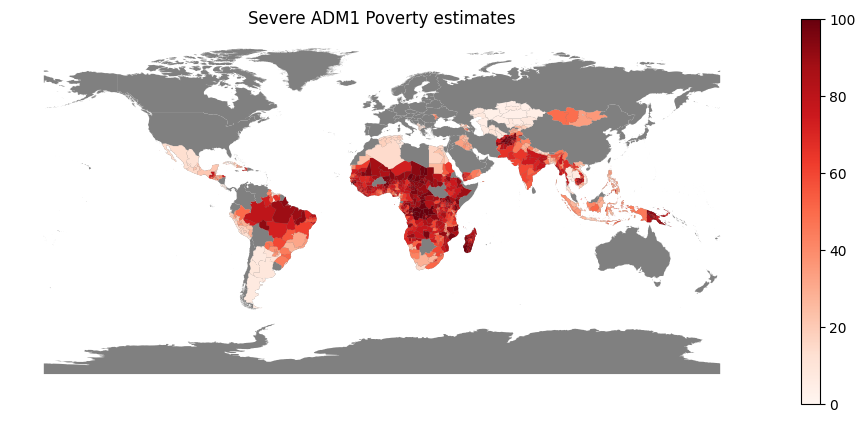

In [18]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)

plt.title('Severe ADM1 Poverty estimates')
plt.axis('off')
plt.show()


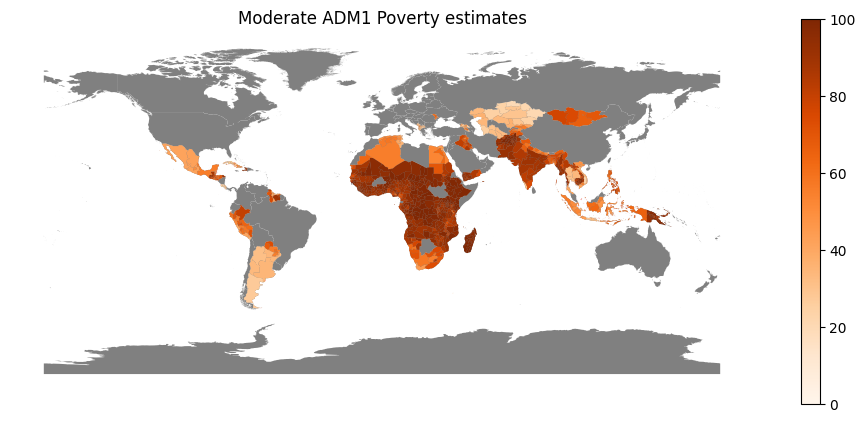

In [19]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='deprived_mod', cmap='Oranges', legend=True, vmin=0, vmax=100)

plt.title('Moderate ADM1 Poverty estimates')
plt.axis('off')
plt.show()


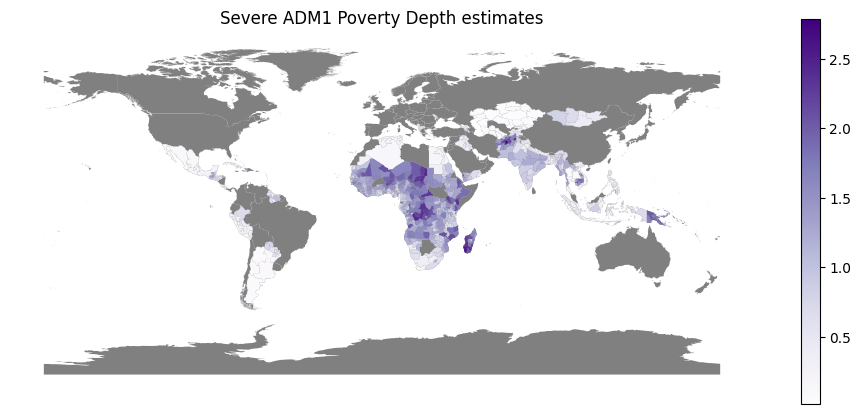

In [20]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='sumpoor_sev', cmap='Purples', legend=True)

plt.title('Severe ADM1 Poverty Depth estimates')
plt.axis('off')
plt.show()


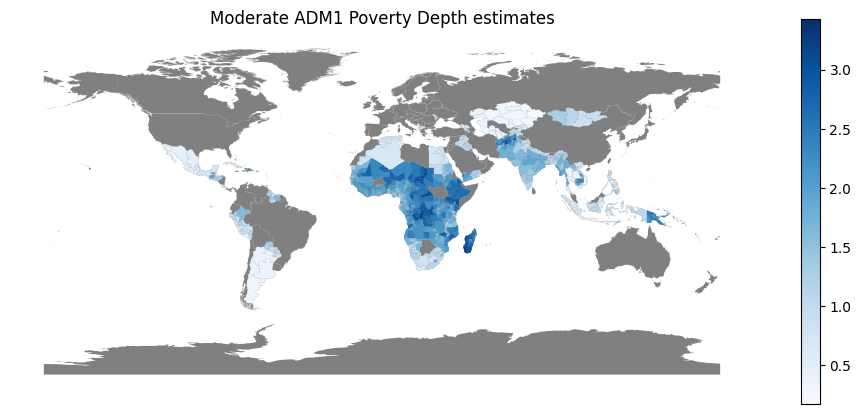

In [21]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='sumpoor_mod', cmap='Blues', legend=True)

plt.title('Moderate ADM1 Poverty Depth estimates')
plt.axis('off')
plt.show()


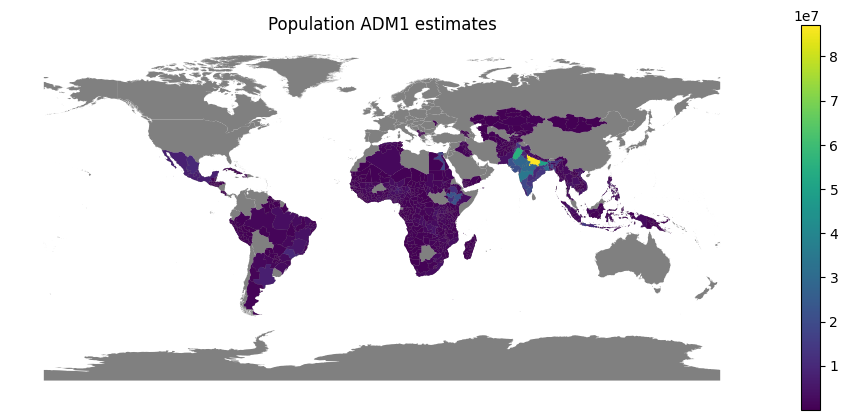

In [22]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='pop0017', cmap='viridis', legend=True)

plt.title('Population ADM1 estimates')
plt.axis('off')
plt.show()


<Axes: >

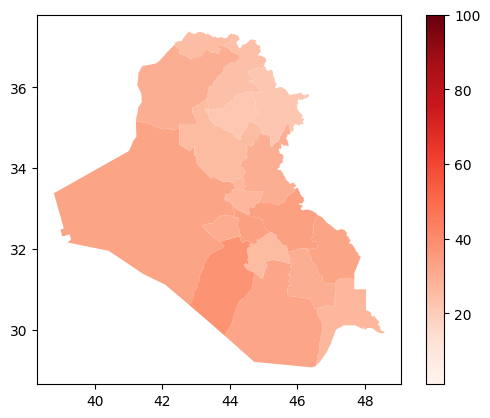

In [23]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(column='deprived_sev', cmap='Reds', legend=True, vmin=1, vmax=100)


<Axes: >

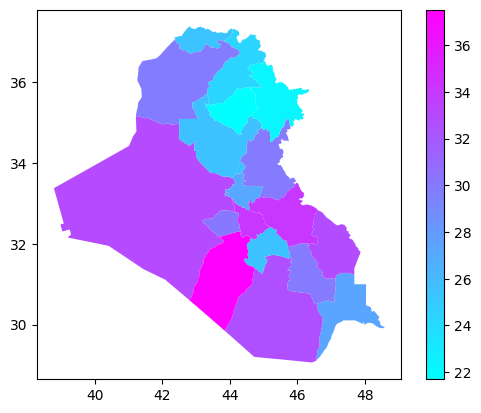

In [24]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(column='deprived_sev', cmap='cool', legend=True)


# Merge MOSAIKS and Poverty

In [12]:
# DROP MISSING GEOMETRY IN POV ADM1 (i.e. COL e DOM)
pov_adm1.dropna(subset=['geometry'], inplace=True)

In [13]:
pov_adm1[pov_adm1['geometry'].isnull()]

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry


In [14]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].shape

(18, 18)

In [15]:
mosaiks_adm1[mosaiks_adm1['shapeGroup']=='IRQ'].shape

(19, 4010)

I cannot use the adm1 name because they are very different in pov_adm1 and mosaiks_adm1

In [16]:
pov_adm1[pov_adm1['countrycode']=='IRQ']['SUBREGION_NAME']

451           Anbar
452          Basrah
453        Muthanna
454       Qadissiya
455           Najaf
456           Erbil
457          Kirkuk
458           Babil
459         Baghdad
460         Thi-Qar
461           Dahuk
462          Diyala
463         Kerbala
464          Missan
465          Ninewa
466    Salah al-Din
467    Sulaymaniyah
468          Wassit
Name: SUBREGION_NAME, dtype: object

In [17]:
mosaiks_adm1[mosaiks_adm1['shapeGroup']=='IRQ']['shapeName']

1158           Dohuk
1159    Al-Qadisiyah
1160           Babil
1161           Basra
1162         Dhi Qar
1163         Karbala
1164          Maysan
1165        Muthanna
1166           Najaf
1167           Wasit
1168         Halabja
1169           Erbil
1170          Kirkuk
1171         Nineveh
1172    Sulaymaniyah
1173        Al Anbar
1174         Baghdad
1175          Diyala
1176         Saladin
Name: shapeName, dtype: object

Now I try to join them based on geometry. First I check their crs

In [18]:
pov_adm1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
mosaiks_adm1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
def make_valid(x):
    if x.is_valid:
        return x
    else: 
        return x.buffer(0)


In [21]:
pov_adm1['geometry'] = pov_adm1.apply(lambda x: make_valid(x['geometry']), axis=1)
mosaiks_adm1['geometry'] = mosaiks_adm1.apply(lambda x: make_valid(x['geometry']), axis=1)

In [22]:
mosaiks_adm1['geom_mos'] = mosaiks_adm1['geometry']
pov_adm1['geom_pov'] = pov_adm1['geometry']

In [23]:
tmp = gpd.sjoin(pov_adm1, mosaiks_adm1, how='left', predicate='intersects')

In [24]:
print(tmp.shape)
tmp.head(2)

(6813, 4030)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geom_mos
0,AFG,DHS,71.0,2015.0,94.106728,99.04171,1.767125,2.363397,82.904877,93.396584,...,0.088208,NaN,Khyber Pakhtunkhwa,PK-KP,PAK-ADM1-3_0_0-B8,PAK,ADM1,PAK-ADM0-3_0_0-B1,PAK-ADM1-3_0_0-B8|PAK-ADM0-3_0_0-B1,"POLYGON ((72.88013 33.75440, 72.86372 33.76344..."
0,AFG,DHS,71.0,2015.0,94.106728,99.04171,1.767125,2.363397,82.904877,93.396584,...,0.114912,NaN,Nuristan,AF-NUR,AFG-ADM1-3_0_0-B25,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B25|AFG-ADM0-3_0_0-B1,"POLYGON ((71.19479 36.03901, 71.20266 36.03836..."


In [25]:
(tmp['geom_pov']!=tmp['geometry']).sum()

0

In [26]:
tmp['geom_inter'] = tmp.apply(lambda x: x['geom_pov'].intersection(x['geom_mos']), axis=1)


In [27]:
print(tmp[tmp['geom_pov'].isnull()].shape)
print(tmp[tmp['geom_mos'].isnull()].shape)

(0, 4031)
(3, 4031)


In [28]:
tmp[tmp['geom_inter'].isnull()]

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,...,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geom_mos,geom_inter
225,COM,DHS,61.0,2012.0,70.022491,91.104935,1.051220,1.871025,74.577454,89.315956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
226,COM,DHS,61.0,2012.0,82.171455,87.329742,1.065330,1.463835,74.577454,89.315956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
604,MDA,MICS,4.0,2012.0,4.392144,37.156345,0.049833,0.481423,33.806221,57.777725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [29]:
def get_area(x):
    try:
        return x.area
    except:
        return 0

In [30]:
tmp['area_inter'] = tmp.apply(lambda x: get_area(x['geom_inter']), axis=1)

In [31]:
sum(tmp['area_inter']==0)

3

In [39]:
tmp['area_inter'].describe()

count    6813.000000
mean        0.737172
std         3.742311
min         0.000000
25%         0.000603
50%         0.003173
75%         0.036960
max       126.890280
Name: area_inter, dtype: float64

In [32]:
tmp['area_pov'] = tmp.apply(lambda x: get_area(x['geom_pov']), axis=1)

In [33]:
tmp['area_pov'].describe()

count    6813.000000
mean        7.230561
std        16.963934
min         0.001390
25%         0.683665
50%         2.246142
75%         6.473789
max       177.770777
Name: area_pov, dtype: float64

In [34]:
tmp['perc_pov'] = tmp['area_inter'] / tmp['area_pov']

In [35]:
THRESHOLD = 0.51

In [36]:
tmp[tmp['perc_pov']>THRESHOLD]['perc_pov'].describe()

count    1033.000000
mean        0.957610
std         0.077527
min         0.510031
25%         0.960786
50%         0.982961
75%         0.993772
max         1.000000
Name: perc_pov, dtype: float64

In [37]:
print(tmp[tmp['perc_pov']>THRESHOLD].shape[0])
print(tmp[tmp['perc_pov']>THRESHOLD]['SUBREGION'].nunique())

1033
1033


In [38]:
merged = tmp[tmp['perc_pov']>THRESHOLD].copy()
merged.shape

(1033, 4034)

In [39]:
merged[merged['countrycode']=='IRQ'].shape

(18, 4034)

# De-mean

In [103]:
# merged.drop(columns=['geometry', 'geom_inter', 'geom_mos', 'geom_pov'])

In [104]:
# merged.to_csv('../data/processed/mosaiks_pov_merged.csv', index=False)

In [51]:
merged['deprived_sev_demean'] = merged['deprived_sev'] - merged['nat_deprived_sev']

<Axes: >

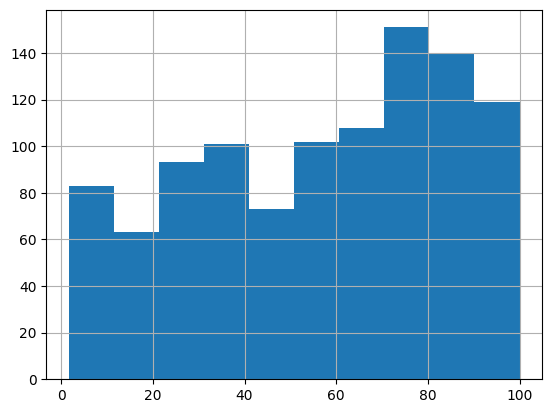

In [53]:
merged['deprived_sev'].hist()

<Axes: >

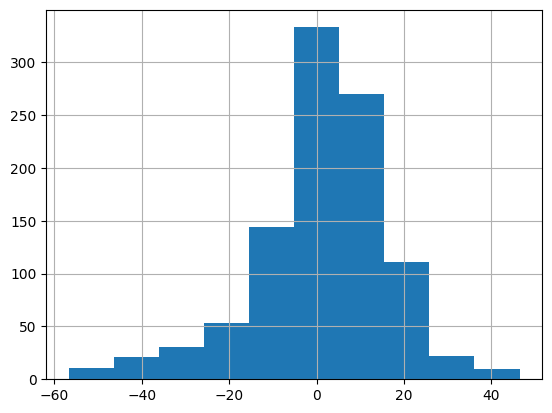

In [52]:
merged['deprived_sev_demean'].hist()

In [77]:
# merged_demean = merged[merged['deprived_sev_demean'].isnull()==False].copy()
# print(merged_demean.shape)

(1006, 4035)


In [91]:
merged.shape

(1033, 4035)

# Model

In [42]:
mosaiks_features = []
for i in range(4000):
    mosaiks_features.append(f'X_{i}')

In [43]:
X, y = merged[mosaiks_features], merged['deprived_sev']

In [91]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
sum(y_train.isnull())

0

Brazil has only deprived_sev and none of the other dimensions.

In [ ]:
# # Standardize the features separately for training and test sets
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.02)  # You can adjust the alpha value (regularization strength)
# lasso_model = LinearRegression()
# lasso_model = ElasticNet()
# lasso_model = SVR(C=1.0)
# lasso_model = SVR(C=0.01)

# Fit the model using K-fold cross-validation on the training data
kf = KFold(n_splits=5, shuffle=True)  

scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring = 'r2')
y_train_pred = cross_val_predict(lasso_model, X_train, y_train, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Fit the model to the entire training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Calculate mean squared error and R-squared on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print()
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.719e+04, tolerance: 5.218e+01
  model = cd_fast.enet_coordinate_descent(
/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.427e+04, tolerance: 5.121e+01
  model = cd_fast.enet_coordinate_descent(
/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

0.46 accuracy with a standard deviation of 0.04
Training Mean Squared Error: 425.50
Training R-squared: 0.45

Mean Squared Error: 468.27
R-squared: 0.39


/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.399e+04, tolerance: 6.422e+01
  model = cd_fast.enet_coordinate_descent(


In [93]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.46 accuracy with a standard deviation of 0.05


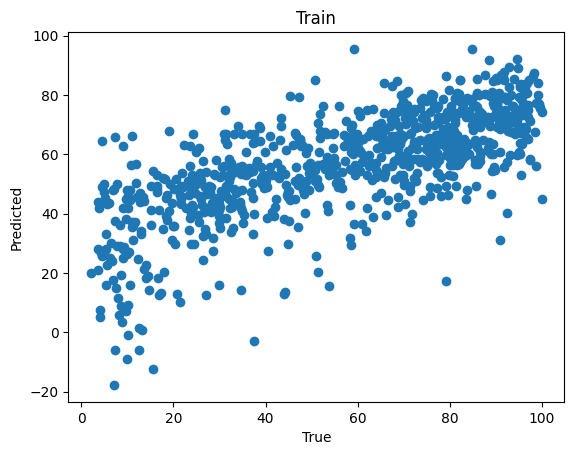

Text(0.5, 1.0, 'Test')

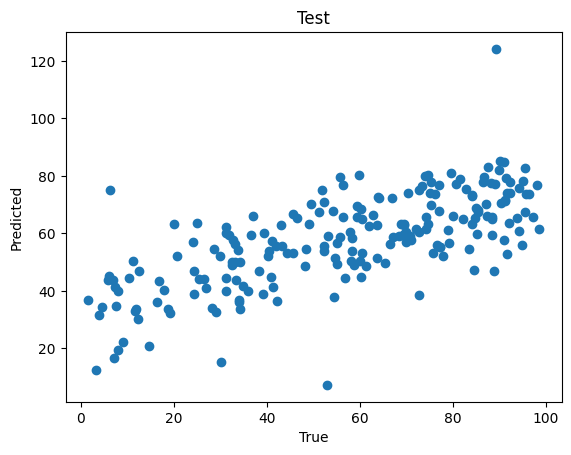

In [49]:
plt.scatter(y_train, y_train_pred)
plt.title('Train')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

plt.scatter(y_test, y_test_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test')

# Evaluate Results

In [52]:
merged['y_pred'] = lasso_model.predict(merged[mosaiks_features])

In [53]:
merged['dep_sev_error'] = merged['deprived_sev']-merged['y_pred']

(array([  3.,   9.,  70., 150., 202., 235., 246.,  98.,  16.,   4.]),
 array([-69.03378408, -55.93055302, -42.82732197, -29.72409091,
        -16.62085985,  -3.5176288 ,   9.58560226,  22.68883331,
         35.79206437,  48.89529543,  61.99852648]),
 <BarContainer object of 10 artists>)

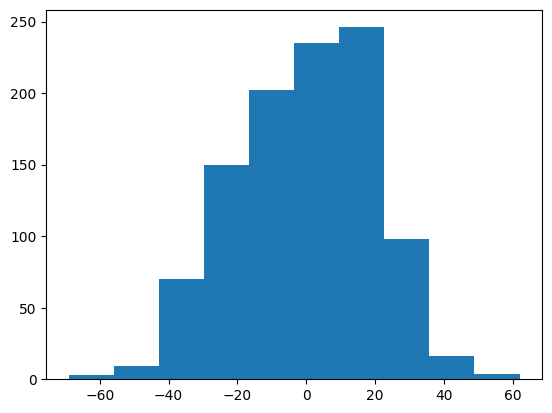

In [54]:
plt.hist(merged['dep_sev_error'])

In [55]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [82]:
print(merged['dep_sev_error'].describe())

# Compute max error in absolute value to for visualization purposes
val = abs(merged['dep_sev_error'].max())
dep_sev_err_min = -val
dep_sev_err_max = val


count    1033.000000
mean       -0.224318
std        19.763464
min       -69.033784
25%       -14.680511
50%         0.821873
75%        14.479317
max        61.998526
Name: dep_sev_error, dtype: float64


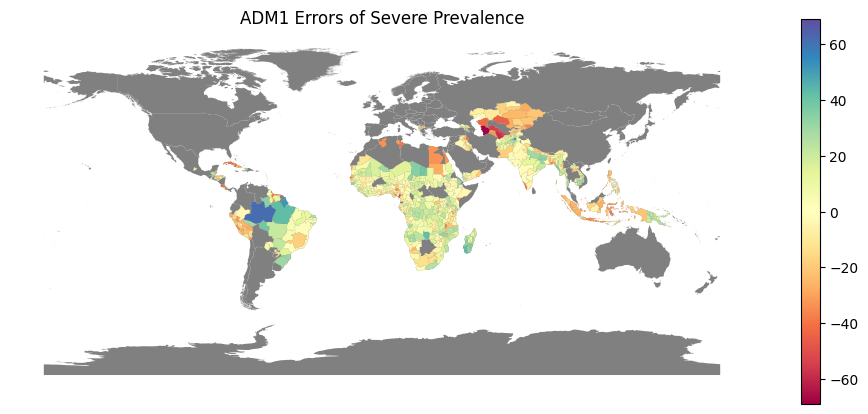

In [83]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
merged.plot(ax=ax, column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)

plt.title('ADM1 Errors of Severe Prevalence')
plt.axis('off')
plt.show()


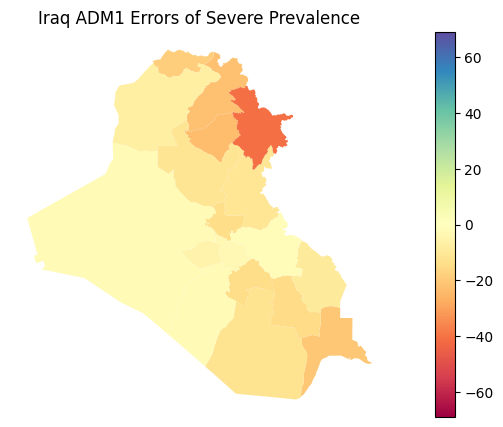

In [84]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot countries with national poverty estimates
merged[merged['countrycode']=='IRQ'].plot(ax=ax, column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)

plt.title('Iraq ADM1 Errors of Severe Prevalence')
plt.axis('off')
plt.show()


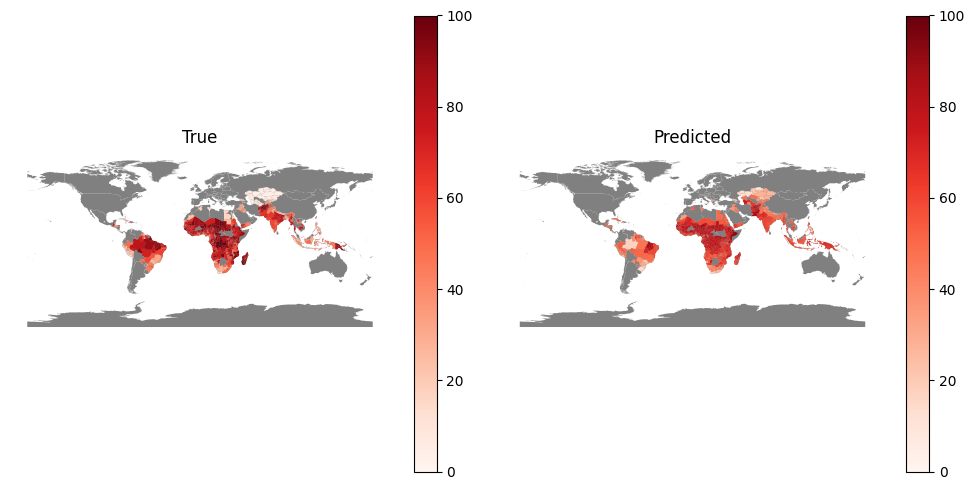

In [60]:
## Predictions vs True

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
geom_adm0.plot(ax=axes[0], color='gray')
merged.plot(ax=axes[0], column='deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)
axes[0].set_title('True')

# Plot the second image on the right subplot
geom_adm0.plot(ax=axes[1], color='gray')
merged.plot(ax=axes[1], column='y_pred', cmap='Reds', legend=True, vmin=0, vmax=100)
axes[1].set_title('Predicted')

# Remove ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
## Rich VS poor

In [71]:
threshold_rich = 50

rich = merged[merged['deprived_sev']<threshold_rich]
poor = merged[merged['deprived_sev']>=threshold_rich]


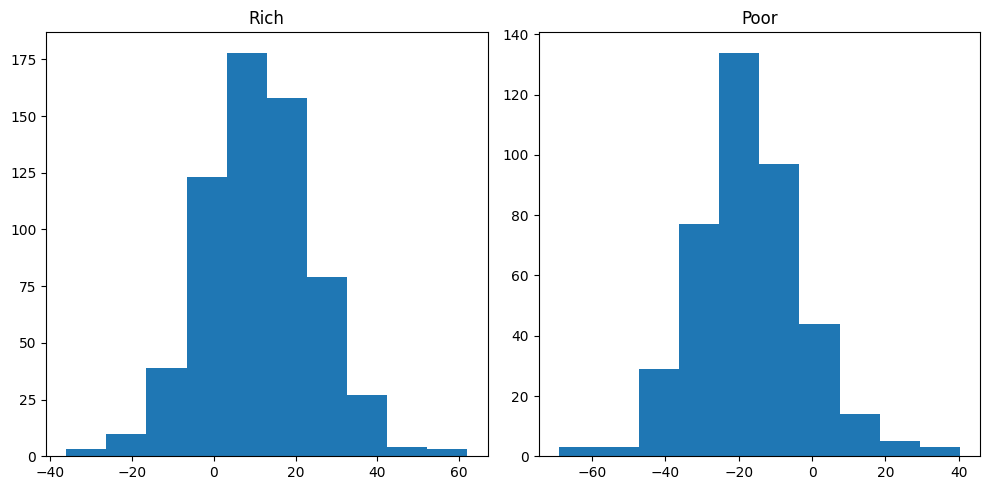

In [66]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].hist(rich['dep_sev_error'])
axes[0].set_title('Rich')

# Plot the second image on the right subplot
axes[1].hist(poor['dep_sev_error'])
axes[1].set_title('Poor')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


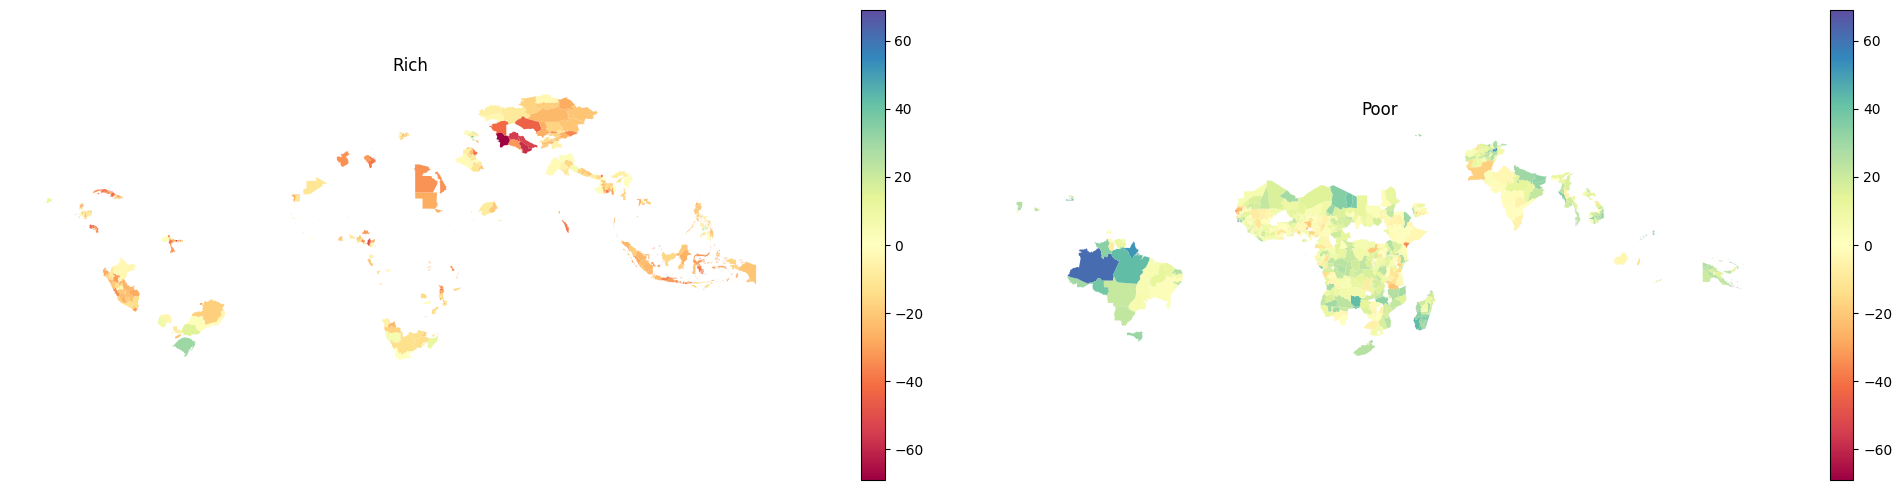

In [85]:
## Predictions vs True

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the first image on the left subplot
# geom_adm0.plot(ax=axes[0], color='gray')
rich.plot(ax=axes[0], column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)
axes[0].set_title('Rich')

# Plot the second image on the right subplot
# geom_adm0.plot(ax=axes[1], color='gray')
poor.plot(ax=axes[1], column='dep_sev_error', cmap='Spectral', legend=True, vmin = dep_sev_err_min, vmax = dep_sev_err_max)
axes[1].set_title('Poor')

# Remove ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [75]:
# cannot do the comparison for IRQ because they all fit in the rich parts

merged[merged['countrycode']=='IRQ']['deprived_sev']

451    32.944675
452    27.264933
453    32.636909
454    25.434816
455    37.521786
456    24.332230
457    21.695940
458    34.061211
459    27.032141
460    29.908176
461    25.353554
462    29.898977
463    30.142340
464    32.772488
465    29.809587
466    25.552618
467    22.255577
468    34.077614
Name: deprived_sev, dtype: float64

# Falcon

In [108]:
import tqdm as notebook_tqdm

In [110]:
from falcon import AutoML


In [111]:
manager = AutoML(task = 'tabular_regression', train_data = merged, features = mosaiks_features, target = 'deprived_sev_demean', config = 'PlainLearner.hgbt')



Initializing a new TabularTaskManager for task `tabular_regression`
<class 'geopandas.geodataframe.GeoDataFrame'>
Beginning training
Starting cross validation
Fitting the pipeline...
Fitting the pipeline...
Fitting the pipeline...
Fitting the pipeline...
Fitting the pipeline...
Finished cross-validation
Beginning the main training phase
Fitting the pipeline...
Finished training

          N_SAMPLES        R2       RMSE         MSE        MAE     RMSLE  \
train         1006  0.944358   3.614453   13.064273   1.669283  1.284941   
eval_cv       1006  0.151205  14.016614  196.684867  10.534171  2.639672   

            SCORE  SC_SCORE  
train    0.944358  0.972179  
eval_cv  0.151205  0.575603   

Saving the model ...


KeyboardInterrupt: 

In [50]:
# def nearly_identical(geoms, p):
#     nearly = (geoms.intersection(p).area / p.area) > 0.75
#     # return index values where nearly is True
#     return pd.Series(nearly.index[nearly])

